## Notes


# load useful libraries

In [10]:
import scanpy as sc
import pandas as pd

from warnings import filterwarnings
filterwarnings('ignore')

sc.settings.verbosity = 3
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.21.6 scipy==1.8.0 pandas==1.5.1 scikit-learn==1.1.2 statsmodels==0.13.2 python-igraph==0.10.2 pynndescent==0.5.7


# read data

In [2]:
adata = sc.read_h5ad('../sc_training.h5ad')
adata #lists the data that is tacked on to adata, see this graphic:

AnnData object with n_obs × n_vars = 28697 × 15077
    obs: 'gRNA_maxID', 'state', 'condition', 'lane'
    layers: 'rawcounts'

In [3]:
adata.obs #lets you see the columns in obs

,gRNA_maxID,state,condition,lane
053l1_AAACCTGAGATGTCGG-1,ONE-NON-GENE-SITE-7,terminal exhausted,Unperturbed,lane1
053l1_AAACCTGAGCAACGGT-1,Tox2-3,effector,Tox2,lane1
053l1_AAACCTGAGTACGACG-1,Tpt1-2,effector,Tpt1,lane1
053l1_AAACCTGAGTCGTTTG-1,Tox2-3,terminal exhausted,Tox2,lane1
053l1_AAACCTGAGTGAAGAG-1,Tcf7-2,effector,Tcf7,lane1
...,...,...,...,...
053l4_TTTGTCATCAGGTTCA-1,Tox2-3,other,Tox2,lane4
053l4_TTTGTCATCAGTGTTG-1,Dvl2-3,cycling,Dvl2,lane4
053l4_TTTGTCATCCTCGCAT-1,Zeb2-2,cycling,Zeb2,lane4
053l4_TTTGTCATCTTCAACT-1,Sox4-3,cycling,Sox4,lane4


In [4]:
adata.layers #layers are different versions of the data (i.e: normalized or unnormalized)

Layers with keys: rawcounts

# adata.X stores the standard-normalized data, but you can also reconstruct it using adata.layers['rawcounts']

In [5]:
# make a copy of normalized logcounts
adata.layers['normalized_logcounts'] = adata.X.copy() #creates a new layer with the original data

In [6]:
adata #see that a new layer, "normalized_logcounts" has been created

AnnData object with n_obs × n_vars = 28697 × 15077
    obs: 'gRNA_maxID', 'state', 'condition', 'lane'
    layers: 'rawcounts', 'normalized_logcounts'

In [7]:
# standard normalization
adata.X = adata.layers['rawcounts'].copy()  #adata.X is the rawcounts, maybe you always set adata.X to what you want to compute on?

sc.pp.normalize_total(adata, target_sum=5e3) #normalize adata.X (the rawcounts)
sc.pp.log1p(adata) #log transform adata.X

normalizing counts per cell
    finished (0:00:00)


In [8]:
#adata can be viewed as a dataframe 
adata.to_df(layer="normalized_logcounts").head()

#use layer = 'rawcounts' to view rawcounts

,Mrpl15,Lypla1,Tcea1,Atp6v1h,Rb1cc1,4732440D04Rik,Pcmtd1,Gm26901,Rrs1,Adhfe1,...,Slc3a1,Cfap53,Pstpip2,Gm17227,Ms4a8a,9130016M20Rik,Htr7,Col17a1,Awat2,Amot
053l1_AAACCTGAGATGTCGG-1,0.511520,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
053l1_AAACCTGAGCAACGGT-1,0.484165,0.484165,0.808991,0.0,0.0,0.0,0.000000,0.0,0.484165,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
053l1_AAACCTGAGTACGACG-1,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.693748,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
053l1_AAACCTGAGTCGTTTG-1,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
053l1_AAACCTGAGTGAAGAG-1,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# visualize cell state clusters on umap

In [76]:
#not sure how they specify if the rawcounts or logcounts are being specified here? 
#I think bc we did adata.X = rawcounts and then normalized/applied log, the data we are working with by default is normalized / log applied
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=30, n_pcs=50)
sc.tl.umap(adata, min_dist=0.3) 

computing PCA
    with n_comps=50
    finished (0:00:35)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:23)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:25)


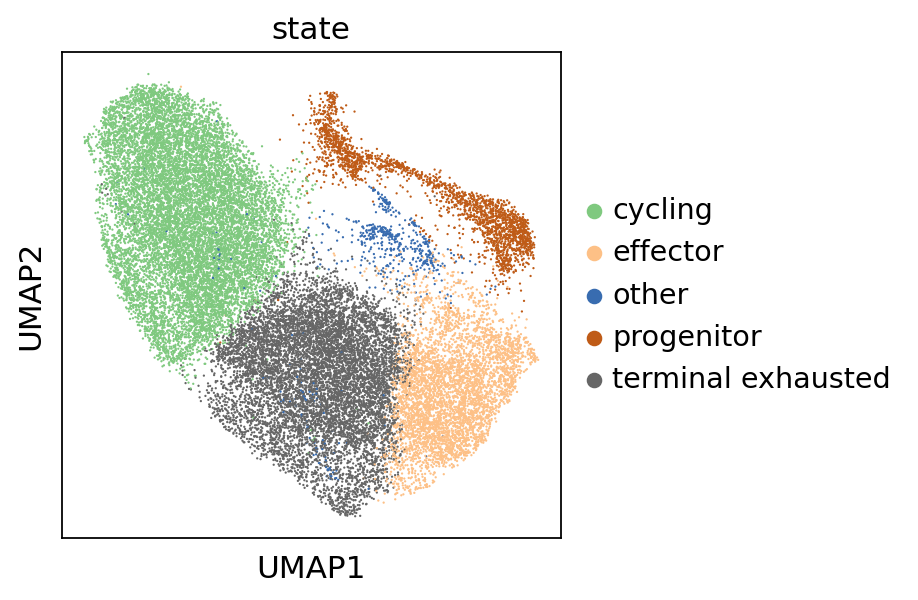

In [77]:
sc.pl.umap(adata, color=['state'], palette='Accent', legend_loc='right margin')

# Heatmap, histogram and other EDA
## Expression heatmap with dendrogram

In [52]:
#run these to get differential expression values and create heatmap with dendrogram

sc.tl.rank_genes_groups(adata,'state', pts = True)
sc.tl.dendrogram(adata, 'state')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:05)


**You can save the differential expression analysis in a dataframe using the below command. Group here refers to one of the T-cell states
passing None will return all the groups**

In [53]:

dedf = sc.get.rank_genes_groups_df(adata, group = None)
dedf

,group,names,scores,logfoldchanges,pvals,pvals_adj,pct_nz_group,pct_nz_reference
0,cycling,Hist1h2ap,212.137909,3.735258,0.0,0.0,0.981315,0.417460
1,cycling,Tuba1b,198.445908,2.532192,0.0,0.0,0.999017,0.702455
2,cycling,Tubb5,185.846756,2.419826,0.0,0.0,0.997623,0.690330
3,cycling,Top2a,184.784653,3.065933,0.0,0.0,0.975086,0.338830
4,cycling,Hist1h2ae,181.245270,3.439355,0.0,0.0,0.973693,0.446438
...,...,...,...,...,...,...,...,...
75380,terminal exhausted,Top2a,-100.949615,-2.265356,0.0,0.0,0.409825,0.700203
75381,terminal exhausted,Hist1h2ab,-104.084076,-3.244213,0.0,0.0,0.160744,0.592596
75382,terminal exhausted,Hist1h2ae,-107.337502,-2.499196,0.0,0.0,0.536928,0.731491
75383,terminal exhausted,Hist1h2ap,-112.232635,-2.684600,0.0,0.0,0.505960,0.726065


"To identify differentially expressed genes we run sc.tl.rank_genes_groups. This function will take each group of cells and compare the distribution of each gene in a group against the distribution in all other cells not in the group. Here, we will use the original cell labels given by 10x to identify marker genes for those cell types." https://scanpy-tutorials.readthedocs.io/en/latest/plotting/core.html

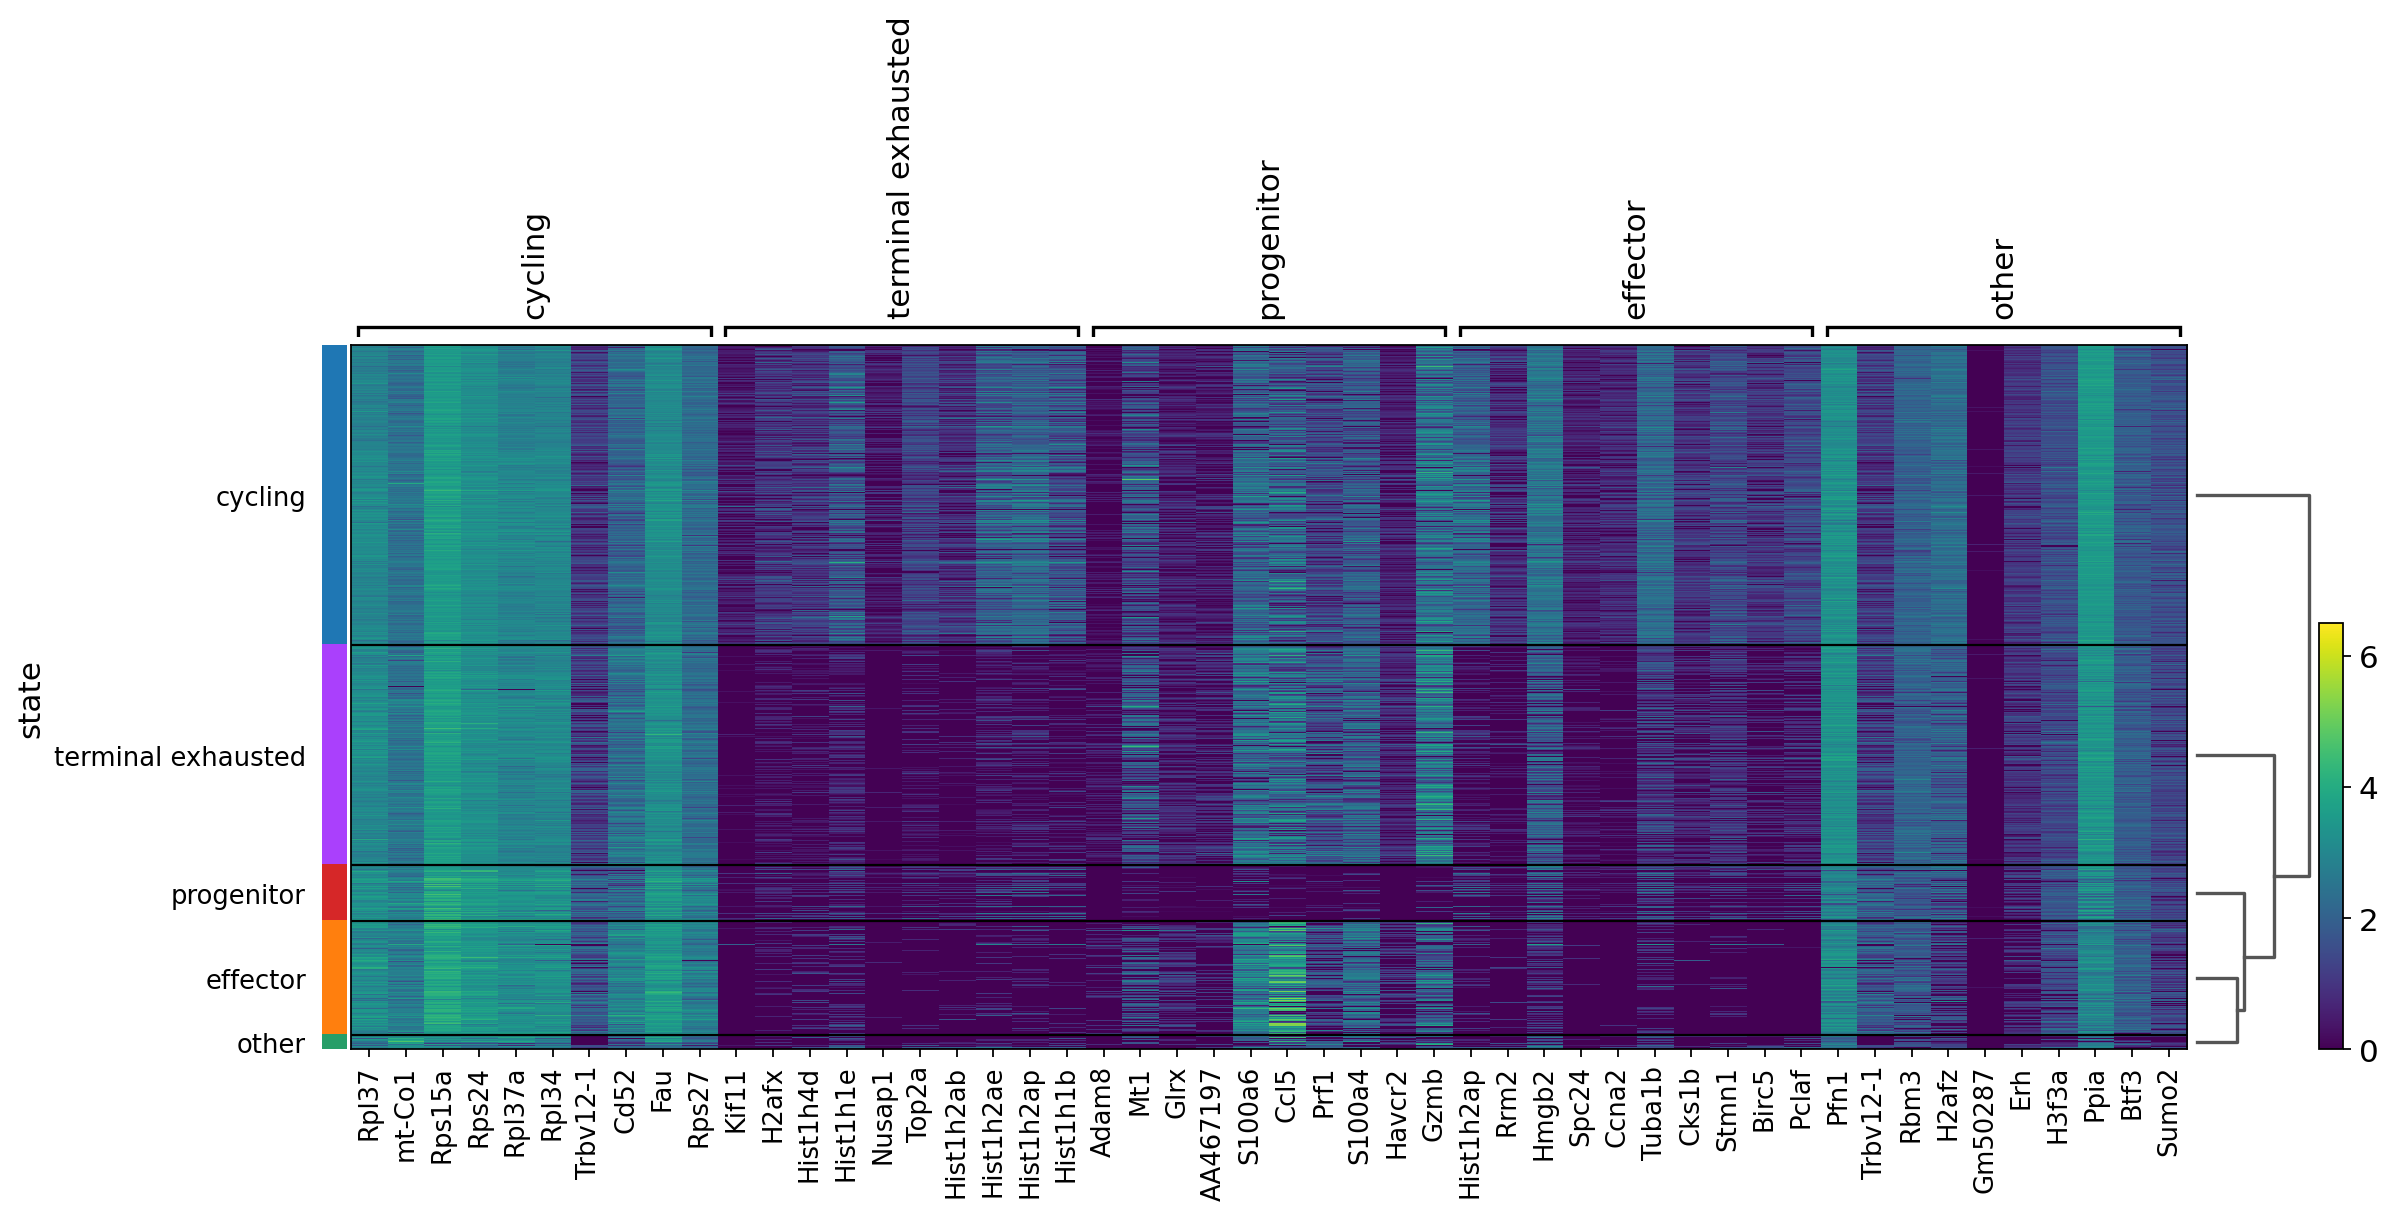

In [13]:
#create a heatmap with the 10 most downregulated genes
sc.pl.rank_genes_groups_heatmap(adata, n_genes = -10, save = '_downregulated.png' )

# Data Summarization

Questions:

Are there genes in the unperturbed case that just happen to not be expressed? 
- Yes, but number of cells varies by gene of interest

How many cells per perturbation?
 - Ranges from 0 to 5000 based on perturbation, see graph 1.
 
How many genes have low or no variance across all cells?
 - Highest variance: 1.475113. With a cutoff of excluding genes with variance lower than 0.014, we have about half the available genes left (7528), see graph 2.
 

In [1]:
#function for filtering out low variance genes
def filter(normdf):
    var_per_gene = normdf.var(axis = 0)
    filt = var_per_gene[var_per_gene >= ((var_per_gene.sort_values()[-1:][0])/100)]
    X = normdf.filter(filt.index.values, axis = 1)
    return X

In [11]:
#separate by perturbation, make into a function

normdf = adata.to_df(layer="normalized_logcounts")
df_cond = pd.DataFrame(adata.obs['condition'])
unpert_sample_in = df_cond[df_cond['condition'] == 'Unperturbed'].index

df_unpert = normdf.filter(unpert_sample_in, axis = 0)
df_unpert.head() 

df_unpert_labels = adata.obs['state'].filter(unpert_sample_in, axis = 0)

filter(df_unpert).head()

,Mrpl15,Lypla1,Tcea1,Atp6v1h,Rb1cc1,Pcmtd1,Rrs1,Vcpip1,Snhg6,Cops5,...,mt-Nd3,mt-Nd4l,mt-Nd4,mt-Nd5,mt-Nd6,mt-Cytb,CAAA01118383.1,Vamp7,CAAA01147332.1,AC149090.1
053l1_AAACCTGAGATGTCGG-1,0.511520,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,1.610826,1.099769,0.000000,0.000000,1.736030,0.000000,0.0,0.000000,0.0
053l1_AAACCTGAGTGTTAGA-1,0.000000,1.089103,0.686024,0.686024,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.686024,1.375591,0.686024,0.000000,0.686024,1.779859,0.686024,0.0,0.000000,0.0
053l1_AAACCTGCATAGACTC-1,0.292065,0.292065,0.292065,0.292065,0.292065,0.0,0.292065,0.0,0.0,0.517829,...,0.517829,2.135607,1.216197,1.479762,0.000000,2.284313,0.292065,0.0,0.292065,0.0
053l1_AAACGGGAGTGGAGAA-1,1.020401,1.020401,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,1.020401,0.000000,0.000000,1.844182,0.000000,0.0,1.020401,0.0
053l1_AAACGGGCAATCGAAA-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,1.836899,2.187799,2.187799,0.000000,0.000000,2.187799,0.000000,0.0,0.000000,0.0


**Validation-test split: The 7 held-out genes will be organised into 3 genes in the validation set (targeting genes 'Aqr', 'Bach2', 'Bhlhe40'), and 4 in the test set (targeting genes 'Ets1', 'Fosb', 'Mafk', 'Stat3').**

Check validation and test set, do these have data we can draw from by looking at naturally low expression cells?
- Yes

How about all other genes?



In [45]:
perturbs = ['Aqr', 'Bach2', 'Bhlhe40', 'Ets1', 'Fosb', 'Mafk', 'Stat3']
means = []
columns = []
stds = []
counts = []
mean = df_unpert.mean()
std = df_unpert.std()
for p in perturbs: 
    if sum(df_unpert.columns.str.contains(p)) > 0 : #only continue if the value in pertubrations exists
        columns.append(p)
        means.append(mean[p])
        stds.append(std[p])
        count = df_unpert[[p]][df_unpert[p] == 0].count()[0]
        counts.append(count)


In [105]:
df_sum = pd.DataFrame([means,stds,counts], columns = columns, index = ['mean', 'std', 'no_expr_cells']).T
df_sum['no_expr/total_cell'] = df_sum['no_expr_cells']/df_unpert.shape[0]
df_sum

,mean,std,no_expr_cells,no_expr/total_cell
Aqr,0.116533,0.228614,3673.0,0.737847
Bach2,0.044318,0.169790,4548.0,0.913620
Bhlhe40,1.083676,0.604790,561.0,0.112696
Ets1,0.637164,0.472372,1100.0,0.220972
Fosb,0.066023,0.206338,4319.0,0.867618
Mafk,0.039523,0.144748,4530.0,0.910004
Stat3,1.149017,0.535393,393.0,0.078947


In [49]:
df_unpert.shape

(4978, 15077)

'Bhlhe40', 'Ets1', 'Stat3' have very low numbers of cells with no expression, can we incorporate prior knowledge?
- panther database had most of these in known relationships
- for "Bhlhe40" had to use external resouce: https://pathcards.genecards.org/card/circadian_clock, adding Bhle40 to gene list

In [102]:
path_df = pd.read_csv('./data/gene_pathway.csv')

In [103]:
#path_df.loc[len(path_df.index)] = ['Circadian clock system', 'Bhlhe40']
#path_df.to_csv('./gene_pathway.csv', index = None)

In [104]:
#no pathway
print(path_df[path_df['hugo_gene'] == 'Bhlhe40'])

path_df[path_df['pathway'] == 'Circadian clock system']

                     pathway hugo_gene
3026  Circadian clock system   Bhlhe40


,pathway,hugo_gene
2620,Circadian clock system,Vamp2
2621,Circadian clock system,Csnk1d
2622,Circadian clock system,Cry1
2623,Circadian clock system,Csnk1e
2624,Circadian clock system,Per1
3026,Circadian clock system,Bhlhe40


In [69]:
print(path_df[path_df['hugo_gene'] == 'Ets1'])

print('Ras Pathway genes: ')
print(path_df[path_df['pathway'] == "Ras Pathway"]['hugo_gene'].values)

print('PDGF signaling pathway genes: ')
print(path_df[path_df['pathway'] == "PDGF signaling pathway"]['hugo_gene'].values)

print('Angiogenesis genes: ')
print(path_df[path_df['pathway'] == "Angiogenesis"]['hugo_gene'].values)

print('VEGF signaling pathway genes: ')
print(path_df[path_df['pathway'] == "VEGF signaling pathway"]['hugo_gene'].values)


                     pathway hugo_gene
884              Ras Pathway      Ets1
1106  PDGF signaling pathway      Ets1
1376            Angiogenesis      Ets1
2374  VEGF signaling pathway      Ets1
Ras Pathway genes: 
['Mapkapk3' 'Rhob' 'Kras' 'Grb2' 'Jun' 'Araf' 'Pik3cg' 'Rac1' 'Rhoa'
 'Mapk9' 'Map2k7' 'Gsk3a' 'Rps6kb1' 'Rala' 'Map3k4' 'Ets1' 'Mapk3'
 'Map2k4' 'Mapkapk2' 'Mapk1' 'Pik3c3' 'Rps6ka3' 'Atf2' 'Akt1' 'Srf' 'Rac2'
 'Mapk14' 'Rhoc' 'Cdc42' 'Map3k1' 'Pak2' 'Pdpk1' 'Pik3ca' 'Stat1' 'Stat3'
 'Pik3cd' 'Sos1' 'Map2k3' 'Hras' 'Shc1' 'Sos2' 'Braf' 'Nras' 'Map2k1'
 'Map2k2' 'Raf1' 'Pak3' 'Rps6ka1' 'Gsk3b' 'Exoc2']
PDGF signaling pathway genes: 
['Hmgxb3' 'Rhob' 'Fos' 'Kras' 'Grb2' 'Jun' 'Etv3' 'Itpr3' 'Srgap3' 'Araf'
 'Pik3cg' 'Erf' 'Rps6kb2' 'Pkn2' 'Pik3r1' 'Usf2' 'Itpr2' 'Mtor' 'Elf1'
 'Rps6ka4' 'Gsk3a' 'Rps6kb1' 'Map3k4' 'Ets1' 'Elf2' 'Dlc1' 'Arhgap26'
 'Map3k2' 'Elp1' 'Itpr1' 'Mknk1' 'Mapk3' 'Cops5' 'Mapkapk2' 'Nin' 'Prkca'
 'Ikbkb' 'Stat4' 'Grap' 'Srgap2' 'Mapk1' 'Pik3c3' 'Gabpa' '

In [71]:
print(path_df[path_df['hugo_gene'] == 'Stat3'])

print('Interleukin signaling pathway genes: ')
print(path_df[path_df['pathway'] == "Interleukin signaling pathway"]['hugo_gene'].values)

                                                pathway hugo_gene
626                       Interleukin signaling pathway     Stat3
701     Gonadotropin releasing hormone receptor pathway     Stat3
903                                         Ras Pathway     Stat3
1138                             PDGF signaling pathway     Stat3
1272                         JAK/STAT signaling pathway     Stat3
1406                                       Angiogenesis     Stat3
1679                     EGF receptor signaling pathway     Stat3
1922  Inflammation mediated by chemokine and cytokin...     Stat3
2873                                 CCKR signaling map     Stat3
Interleukin signaling pathway genes: 
['Il2ra' 'Elk3' 'Galt' 'Fos' 'Grb2' 'Araf' 'Il16' 'Il12rb1' 'Mtor' 'Il4r'
 'Map3k4' 'Map3k7' 'Mknk1' 'Mapk3' 'Mapkapk2' 'Ikbkb' 'Stat4' 'Mapk1'
 'Sla2' 'Stat5a' 'Il10ra' 'Rps6ka3' 'Akt1' 'Srf' 'Cdkn1b' 'Mknk2' 'Cdkn1a'
 'Pdpk1' 'Myc' 'Akt2' 'Pik3ca' 'Stat1' 'Stat3' 'Jak3' 'Sos1' 'Elk4'
 'Il21r' 'Mapk6

### Cells per condition

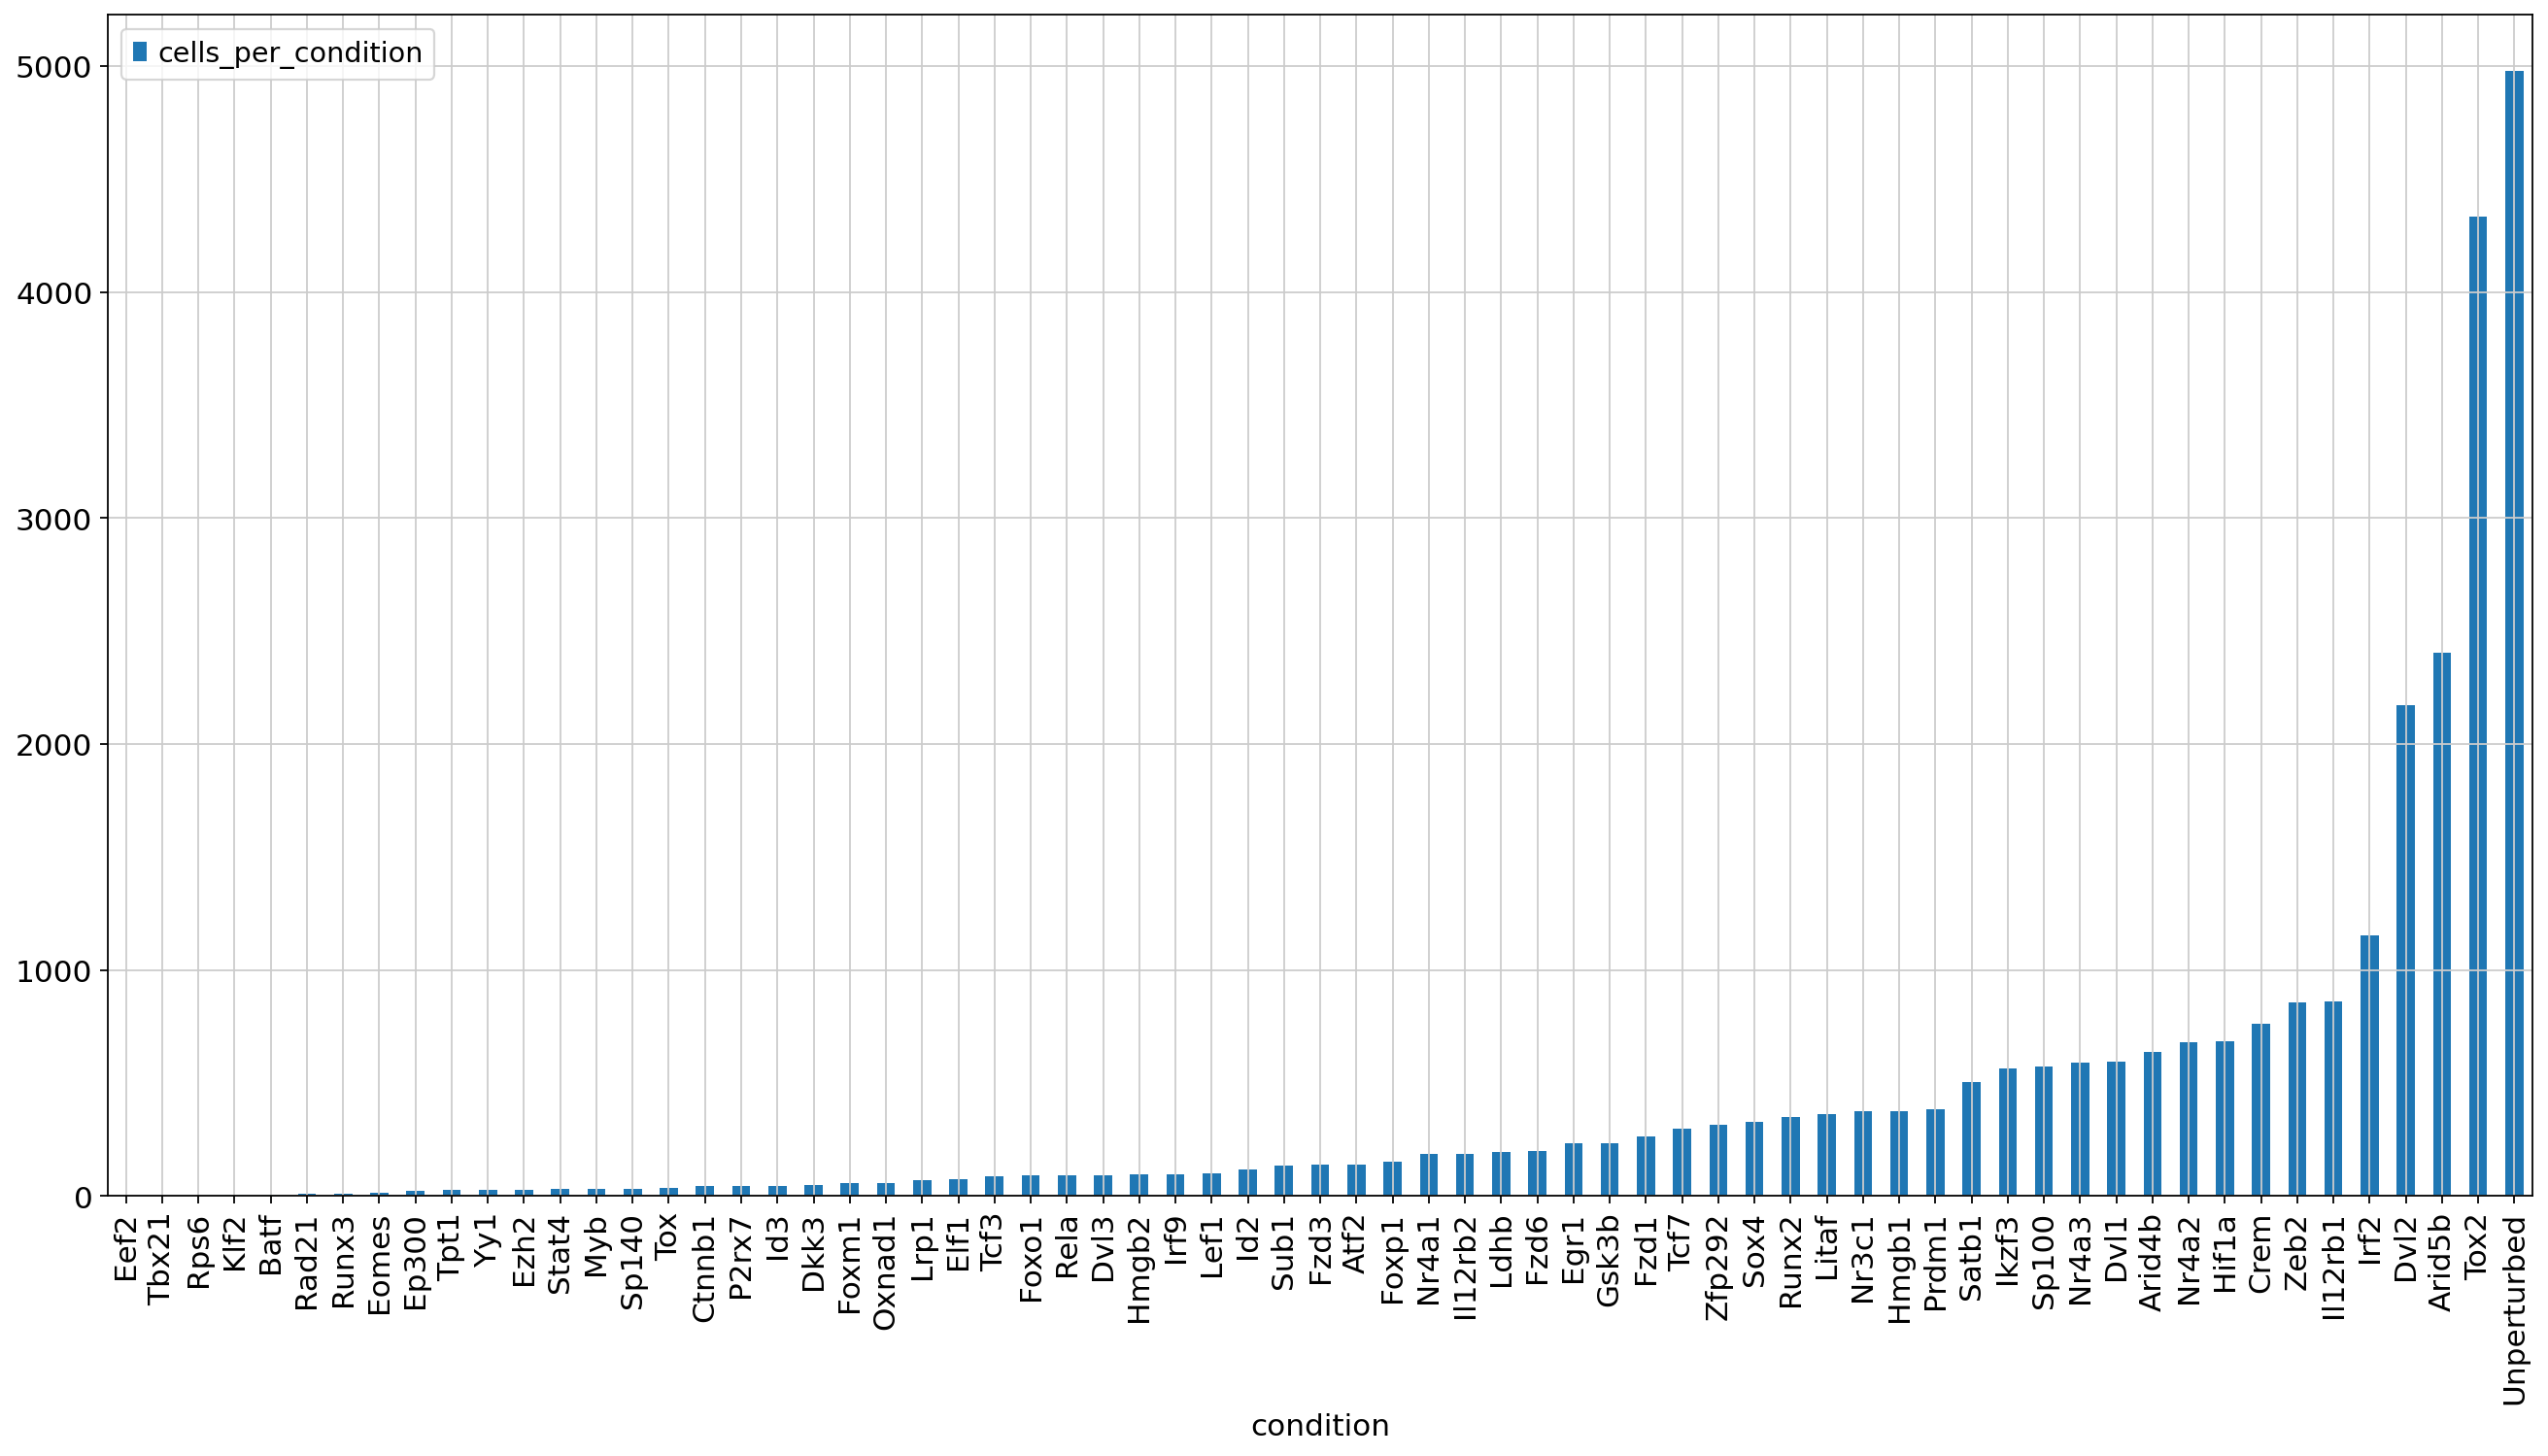

In [43]:
import matplotlib.pyplot as plt


cpc = adata.obs.groupby('condition').agg(cells_per_condition = ('condition', 'count')).sort_values('cells_per_condition')
ax = cpc.plot.bar(figsize=(20, 10))
plt.savefig('cells-per-condition.png')

In [8]:
 df = adata.to_df(layer="normalized_logcounts") 

In [9]:
var_per_gene = df.var(axis = 0) #calculate the variance of each gene

<AxesSubplot: >

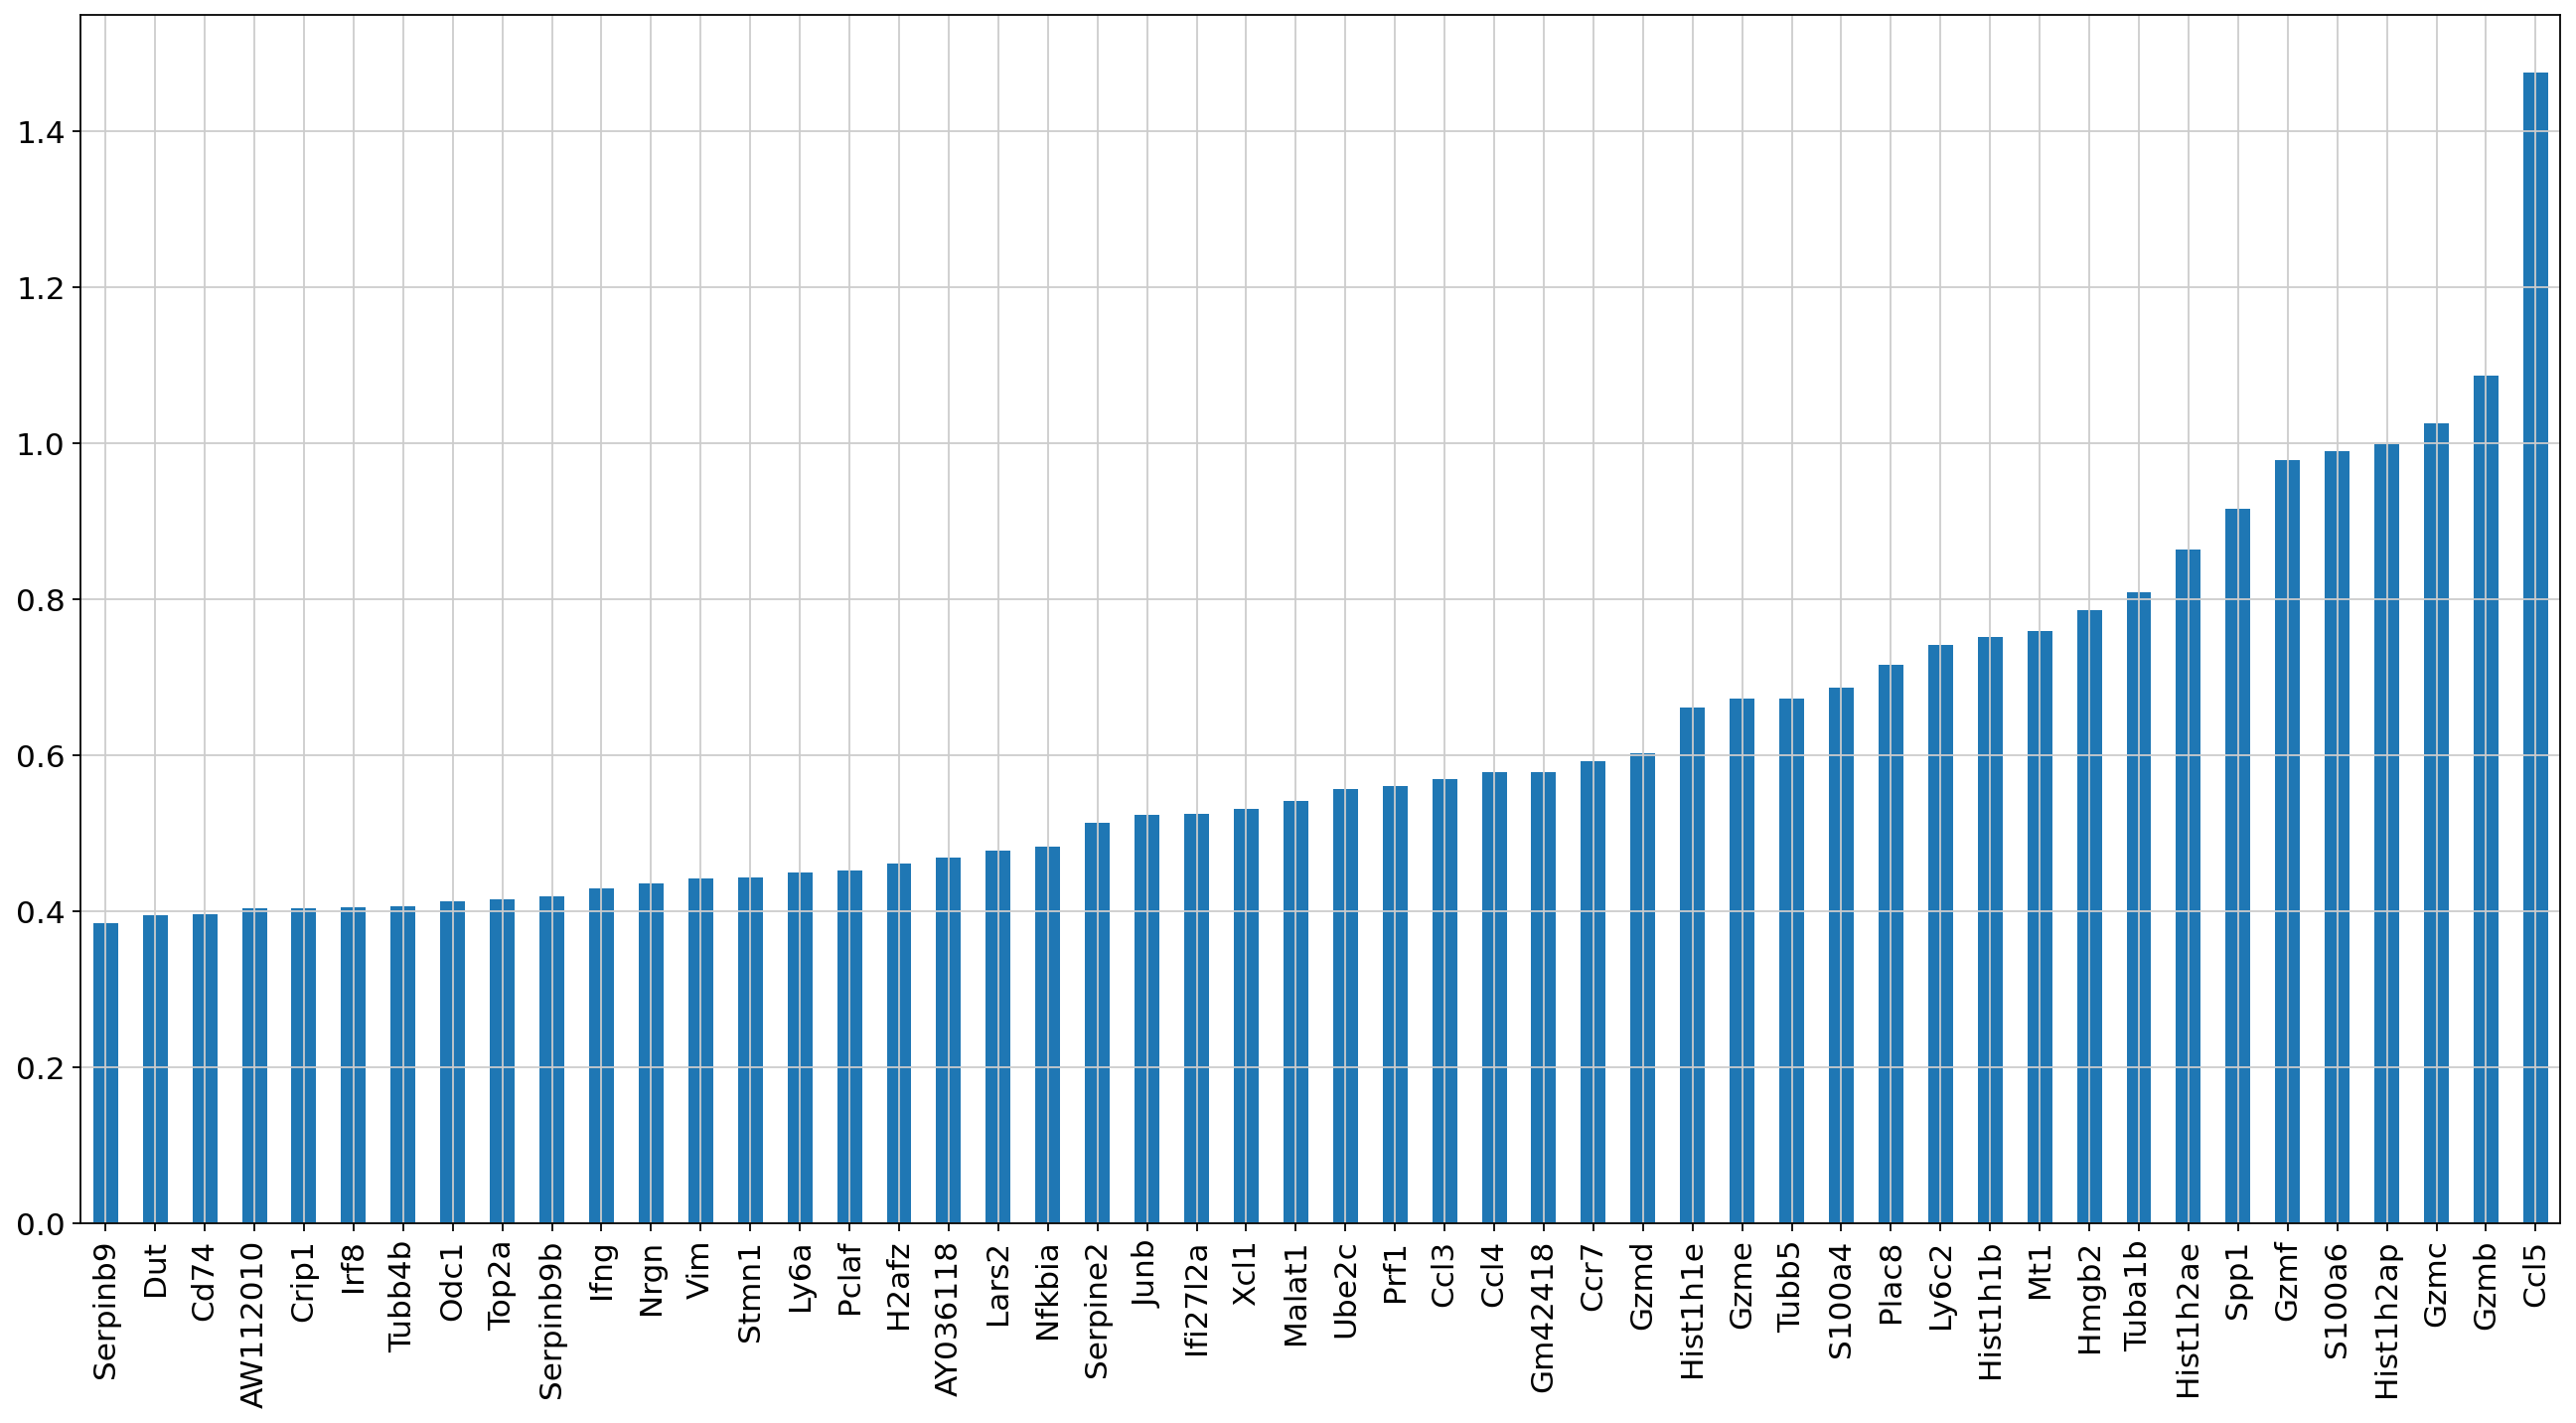

In [11]:
#plot the top 50 most variable genes across all cell samples
var_per_gene.sort_values()[-50:].plot.bar(figsize=(20, 10))

Use 1% of highest variance as a cutoff for "low variance" genes to filter out. Anything with a variance of less than 1.475113/100 is filtered out. Ccl5 is the gene with highest variance across all cells.

In [17]:
#gene with highest variance across all cells
var_per_gene.sort_values()[-1:]

#filter out cells with variance below threshold
var_count = var_per_gene[var_per_gene >= 1.475113/100].count()
print('# of genes after dropping low variance genes: ' + str(var_count))

# of genes after dropping low variance genes: 7416


In [18]:
total_genes = df.shape[1]
print('Percent of total genes left after dropping low variance genes: ' + str((var_count/total_genes)*100))

Percent of total genes left after dropping low variance genes: 49.18750414538701


# PCA
If a low number (~10 components) could explain the variance in the data, then a more structured modeling approach might work. 
- 200 components only explains 23% of the data, suggesting black box methods (neural networks) may be more useful. 
    
Alternative dimension reduction techniques may be worth exploring, such as?

In [20]:
sc.tl.pca(adata, n_comps = 200, svd_solver='arpack')

computing PCA
    with n_comps=200
    finished (0:03:09)


In [22]:
#200 components only explain 23% of the data
sum(adata.uns['pca']['variance_ratio']) 

0.23333318933146074

## Known gene relationships
- Create key to match genes with known pathways (find gene groups based on domain knowledge)
- http://www.pantherdb.org/
- http://www.pantherdb.org/list/batchIdSearch.do convert to hugo names
- http://www.pantherdb.org/list/list.do?numPerPage=10000&save=yes&searchModType=numperpage&listType=8 gene to pathway list

In [11]:
import pandas as pd

def filter(normdf):
    var_per_gene = normdf.var(axis = 0)
    filt = var_per_gene[var_per_gene >= ((var_per_gene.sort_values()[-1:][0])/100)]
    X = normdf.filter(filt.index.values, axis = 1)
    return X

In [125]:
normdf = adata.to_df(layer="normalized_logcounts")
filterdf = filter(normdf) #filter out low variance genes

In [126]:
filterdf_genes = pd.DataFrame(filterdf.columns)
filterdf_genes.to_csv('../filtered_genes.txt', index= None, columns= None )

Run "filtered_genes.txt" through panther database to find pathway hits. http://www.pantherdb.org/list/list.do?numPerPage=10000&save=yes&searchModType=numperpage&listType=8

In [290]:
header = ['pathway_accession', 'mapped_ids', 'pathway', 'components', 'subfamilies', 'associated_sequence'] 
path_df = pd.read_table('./data/pantherGeneList_pathways.txt', names = header)

#path_df["mapped_ids"].replace( { r"," : ', ' }, inplace= True, regex = True)
path_df['mapped_ids'] = path_df['mapped_ids'].apply(lambda x: x.split(','))


In [291]:
path_df = path_df.explode('mapped_ids')
path_df.head()

,pathway_accession,mapped_ids,pathway,components,subfamilies,associated_sequence
0,P06213,MOUSE|MGI=MGI=2137520|UniProtKB=Q9EP52,DPP_signaling_pathway,19,13,13
1,P02748,MOUSE|MGI=MGI=104861|UniProtKB=P24288,Isoleucine biosynthesis,5,29,140
1,P02748,MOUSE|MGI=MGI=1276534|UniProtKB=O35855,Isoleucine biosynthesis,5,29,140
1,P02748,MOUSE|MGI=MGI=1351911|UniProtKB=Q8BU33,Isoleucine biosynthesis,5,29,140
2,P00027,MOUSE|MGI=MGI=107949|UniProtKB=P62746,Heterotrimeric G-protein signaling pathway-Gq ...,21,159,810


In [292]:
path_df.shape

(3026, 6)

In [294]:
#there are duplicates that are part of multiple pathways
path_df[path_df[['mapped_ids']].duplicated()].sort_values('mapped_ids').head()
#path_df[['mapped_ids']].values.shape

,pathway_accession,mapped_ids,pathway,components,subfamilies,associated_sequence
65,P00007,MOUSE|MGI=MGI=101765|UniProtKB=P49615,Axon guidance mediated by semaphorins,14,25,134
136,P06587,MOUSE|MGI=MGI=101765|UniProtKB=P49615,Nicotine pharmacodynamics pathway,27,40,155
20,P05912,MOUSE|MGI=MGI=101765|UniProtKB=P49615,Dopamine receptor mediated signaling pathway,27,85,407
137,P06959,MOUSE|MGI=MGI=101769|UniProtKB=P97287,CCKR signaling map,290,171,171
89,P00011,MOUSE|MGI=MGI=101802|UniProtKB=P30558,Blood coagulation,59,48,201


In [295]:
#save the panther mapped_ids to a list to convert to hugo using:
#http://www.pantherdb.org/list/batchIdSearch.do
pd.DataFrame(path_df['mapped_ids'].values).to_csv('pantherIDS.txt', header= None, index = None)

### Match panther IDs to hugo gene names

In [296]:
header = ['panther_id', 'mapped_id', 'hugo_gene', 'panther_family', 'panther_protein', 'species']
hugo_key = pd.read_table('./data/pantherGeneList_hugokey.txt', names= header)

In [297]:
hugo_key.shape

(1116, 6)

In [298]:
hugo_key.iloc[1]['hugo_gene'].split(';')[1]

'Synj1'

In [299]:
hugo_key['hugo_gene'] = hugo_key['hugo_gene'].apply(lambda x: x.split(';')[1])

In [300]:
hugo_key[hugo_key['panther_id'] == 'MOUSE|MGI=MGI=97846|UniProtKB=Q05144']

,panther_id,mapped_id,hugo_gene,panther_family,panther_protein,species
502,MOUSE|MGI=MGI=97846|UniProtKB=Q05144,MOUSE|MGI=MGI=97846|UniProtKB=Q05144,Rac2,RAS-RELATED C3 BOTULINUM TOXIN SUBSTRATE 2 (PT...,small GTPase(PC00208),Mus musculus


In [301]:
joindf = hugo_key[['mapped_id','hugo_gene']]
joindf.columns = ['mapped_ids', 'hugo_gene']

In [231]:
#path_df.set_index('mapped_ids', inplace= True)
#joindf.set_index('mapped_ids', inplace = True)
#this for some reason made the join bad and gave a lot of NAN, check this out later?^

In [302]:
df = path_df.merge(joindf, how = 'left', on = 'mapped_ids')

In [303]:
df.head()

,pathway_accession,mapped_ids,pathway,components,subfamilies,associated_sequence,hugo_gene
0,P06213,MOUSE|MGI=MGI=2137520|UniProtKB=Q9EP52,DPP_signaling_pathway,19,13,13,Twsg1
1,P02748,MOUSE|MGI=MGI=104861|UniProtKB=P24288,Isoleucine biosynthesis,5,29,140,Bcat1
2,P02748,MOUSE|MGI=MGI=1276534|UniProtKB=O35855,Isoleucine biosynthesis,5,29,140,Bcat2
3,P02748,MOUSE|MGI=MGI=1351911|UniProtKB=Q8BU33,Isoleucine biosynthesis,5,29,140,Ilvbl
4,P00027,MOUSE|MGI=MGI=107949|UniProtKB=P62746,Heterotrimeric G-protein signaling pathway-Gq ...,21,159,810,Rhob


In [304]:
df.to_csv('./data/gene_pathway_list_full.csv', index = False)


In [305]:
df[['pathway', 'hugo_gene']].to_csv('./data/gene_pathway.csv', index = False)

In [306]:
df[df['hugo_gene'].isnull()] #yay everything has a hugo name!

,pathway_accession,mapped_ids,pathway,components,subfamilies,associated_sequence,hugo_gene


In [307]:
path_df[path_df['mapped_ids'] == 'MOUSE|MGI=MGI=1351911|UniProtKB=Q8BU33'] #note that genes can be part of more than one pathway

,pathway_accession,mapped_ids,pathway,components,subfamilies,associated_sequence
1,P02748,MOUSE|MGI=MGI=1351911|UniProtKB=Q8BU33,Isoleucine biosynthesis,5,29,140
82,P02785,MOUSE|MGI=MGI=1351911|UniProtKB=Q8BU33,Valine biosynthesis,4,25,113
